In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print("X: {}, y: {}".format(X.shape, y.shape))

X: (150, 4), y: (150,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

from sklearn.model_selection import train_test_split
trainSize = 0.5
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0, 
                                                train_size = trainSize, test_size = 1.0 - trainSize)
print("Training: {}, {}, testing: {}, {}".format(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape))
print("Whole data: {}".format(X.shape))
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(y_true = ytest, y_pred = ymodel)

Training: (75, 4), (75,), testing: (75, 4), (75,)
Whole data: (150, 4)


0.9066666666666666

In [21]:
from sklearn.model_selection import cross_val_score
cvScore = cross_val_score(model, X, y, cv = 5)
cvScore

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [31]:
from sklearn.model_selection import LeaveOneOut
looScore = cross_val_score(model, X, y, cv = LeaveOneOut())
looScore.mean()

0.96

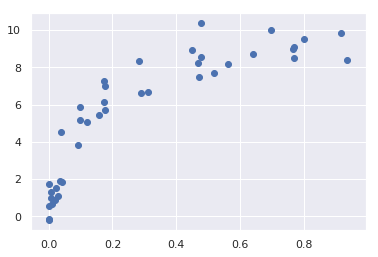

In [48]:
# Learning curves

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

# Create some data
import numpy as np
def makeData(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1.0 / (X.ravel() + 0.1)
    if (err > 0):
        y += err * rng.randn(N)
    return X, y

X, y = makeData(40)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig = plt.figure()
axes = plt.axes()

axes.scatter(X.ravel(), y)

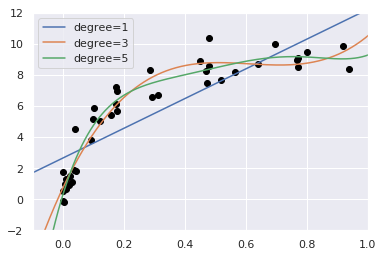

In [58]:
# Plot polynomial fits
Xtest = np.linspace(-0.1, 1.1, 500)[:, None]
fig = plt.figure()
ax = plt.axes()
ax.scatter(X.ravel(), y, color = 'black')

for degree in [1, 3, 5]:
    ytest = PolynomialRegression(degree).fit(X, y).predict(Xtest)
    ax.plot(Xtest.ravel(), ytest, label = 'degree={}'.format(degree))
    
ax.set_xlim(-0.1, 1.0)
ax.set_ylim(-2, 12)
ax.legend(loc = 'best');

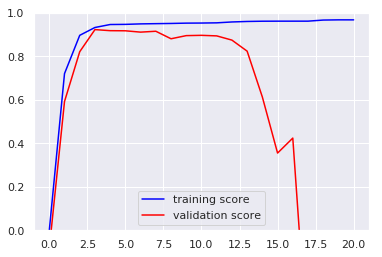

In [79]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
trainScore, valScore = validation_curve(PolynomialRegression(),
                                       X, y,
                                       'polynomialfeatures__degree',
                                       degree, cv = 7)

fig = plt.figure()
axes = plt.axes()
axes.plot(degree, np.median(trainScore, 1), color = 'blue', label = 'training score')
axes.plot(degree, np.median(valScore, 1), color = 'red', label = 'validation score')
axes.set_ylim(0, 1)
axes.legend(loc = 'best')

In [84]:
degree[np.argmax(np.median(valScore, 1))]

3